In [6]:
import argparse
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GroupShuffleSplit
from scipy import stats
from yellowbrick.model_selection import RFECV
from scipy.stats import pearsonr
df = pd.read_csv("Data_all_features.0.9_3.0.tot.csv", sep=',',)
#dft = pd.read_csv("TM_Qmean_unknow", header = 0)
#print(df['violation'])
#pcons = df['Pcons']

# Labels are the values we want to predict
labels = np.array(df['tmalign'])
# Remove the labels from the features
# axis 1 refers to the columns
#df= df.drop('modelID', axis = 1)
cor=df.corr(method = "pearson")
cor.to_csv('correlation.csv')
dft= df.drop(['tmalign','Nmodel',"DIS","FC","FE","FH","A","C","F","I","H","L","N","P","S","Y"],axis = 1)
dft['index'] = dft.index
dft_NoDAN= df.drop(['tmalign', 'modelID','Nmodel','dan'],axis = 1)
dft_NoDANLEN= df.drop(['tmalign', 'modelID','Nmodel','dan','seqlength'],axis = 1)
dfo = df
dfto=dft
df = np.array(df)
#dft = np.array(dft)

dft_NoDAN= np.array(dft_NoDAN)
dft_NoDANLEN=np.array(dft_NoDANLEN)

In [7]:
print(dft)

      modelID  pcons  proq4    dan  seqlength      Neff         E         D  \
0     1825001  0.282  0.176  0.369         48   1.00000  0.000000  0.062500   
1     1825001  0.265  0.154  0.456         48   1.00000  0.000000  0.062500   
2     1825001  0.318  0.174  0.516         48   1.00000  0.000000  0.062500   
3     1825001   0.32  0.162  0.515         48   1.00000  0.000000  0.062500   
4     1825001  0.266  0.175  0.448         48   1.00000  0.000000  0.062500   
5     1027001  0.577  0.136  0.448         32   1.00000  0.093750  0.093750   
6     1027001  0.888  0.127  0.809         32   1.00000  0.093750  0.093750   
7     1027001  0.888  0.127  0.804         32   1.00000  0.093750  0.093750   
8     1027001  0.885  0.133  0.684         32   1.00000  0.093750  0.093750   
9     1027001  0.872  0.131  0.862         32   1.00000  0.093750  0.093750   
10    2042001  0.533  0.206  0.419         54   1.00000  0.111111  0.037037   
11    2042001  0.575  0.220  0.471         54   1.00

In [8]:
df = np.array(df)
kf = KFold(n_splits=5, shuffle=False)
kf.get_n_splits(df)

5

In [13]:
#train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(dft, groups=dfo['modelID']))

gs = GroupShuffleSplit(n_splits=2, test_size=.2, random_state=0)
train_inds, test_inds = next(gs.split(dft, labels, groups=dft['modelID']))


train = df.iloc[train_inds]
test = df.iloc[test_inds]
#print(train_inds)
#test_inds=test_inds[4::5]
print(test)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [11]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
print(kf)

train, test = dft[train_inds], dft[test_inds]
#rf.fit(train, labels[train_inds]);
#predictions = rf.predict(test)
#Pred_TM =[predictions, labels[test_inds]]

for train_inds, test_inds in gss.split(X, y, dft):
    train, test = dft[train_inds], dft[test_inds]
    rf.fit(train, labels[train_inds]);
    predictions = rf.predict(test)
    errors = abs(predictions - labels[test_inds])
    #print('Mean Absolute Error:', round(np.mean(errors), 5), 'TM point.')
    mape = 100 * (errors / labels[test_inds])
    accuracy = 100 - np.mean(mape)
    #MAE = mean_squared_error(labels[test_index], predictions)
    #print('MAE',MAE,)
    #print(round(accuracy, 2))  #print('Accuracy:', round(accuracy, 2), '%.')
    
    Pred_TM =[predictions, labels[test_inds]]
    
    corr, _ = pearsonr(predictions, labels[test_inds])
    print( corr)
    
    #for v in zip(*Pred_TM):
    #    print(*v)


KFold(n_splits=5, random_state=None, shuffle=False)


KeyError: "None of [Int64Index([   5,    6,    7,    8,    9,   10,   11,   12,   13,   14,\n            ...\n            1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779],\n           dtype='int64', length=1435)] are in the [columns]"

[[-0.63316229 -0.3246098   0.06657628 ... -1.11140442  3.36330234
   1.53760099]
 [-0.14048346 -0.81686108  0.33936596 ...  0.4418695   0.63322442
   1.07060605]
 [-1.5917397   0.07704488  1.25647325 ...  0.90744304 -1.13659003
  -1.81836975]
 ...
 [ 1.63846369 -1.44735579 -0.46802685 ...  0.11457932 -1.18227305
   0.72599442]
 [-1.79886344 -0.52941798 -0.19421666 ... -0.22486457 -0.0813801
  -1.33117069]
 [ 1.05454024  0.47470609 -0.73670261 ... -0.86838853 -1.02166211
   0.70167073]] [1 0 4 0 6 4 4 7 1 6 3 5 4 7 5 2 3 7 3 7 6 5 7 5 5 7 6 4 3 7 2 6 7 6 7 6 4
 4 2 0 2 7 3 1 6 0 5 3 3 1 2 7 7 2 2 2 4 1 5 3 4 6 7 4 4 7 4 1 6 3 6 4 2 0
 3 1 4 4 4 6 0 4 5 4 0 6 1 4 4 4 5 2 1 3 4 2 7 2 0 3 7 6 7 3 7 2 0 3 3 4 1
 5 2 3 6 6 3 7 3 0 3 3 1 1 6 5 1 2 7 0 7 7 5 5 1 6 1 5 2 3 0 4 5 4 3 7 1 5
 0 6 2 7 2 1 7 6 6 4 3 4 4 2 4 7 5 2 1 1 3 1 1 2 1 5 6 4 6 1 3 3 3 0 5 0 0
 3 4 4 1 6 4 0 3 7 3 5 6 7 4 7 1 7 1 2 3 2 3 3 6 4 7 6 7 6 0 6 1 5 3 5 1 0
 0 6 6 1 0 6 7 6 0 7 2 2 7 1 5 7 4 4 0 1 2 0 4 5 6 7 1 2 3 

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

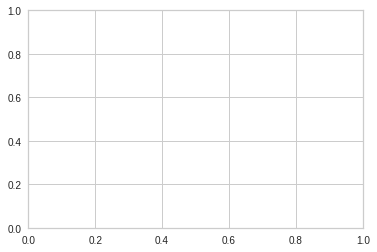

In [7]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=29, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = RandomForestRegressor(n_estimators = 200, random_state = 42)
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
print(X, y) 
rfecv.fit(X, y)

In [8]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_list = ["pcons","proq4","dan","seqlength","Neff","DIS","FC","FE","FH","A","C","E","D","G","F","I","H","K","M","L","N","Q","P","S","R","T","W","V","Y"] #names of features.
ff = np.array(feature_list)

# Print the feature ranking
print("Feature ranking:")

for f in range(dft.shape[1]):
        print("%d. feature: %s (%f)" % (f + 1, ff[indices[f]], importances[indices[f]]))

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

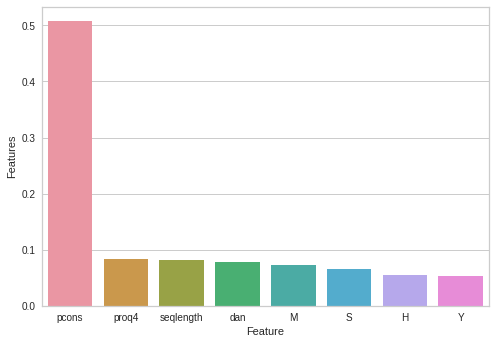

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dff =  pd.read_csv("features.csv")


ax = sns.barplot(x="Feature", y="Importance", data=dff)


ax.set_ylabel("Features")
fig = ax.get_figure()

plt.show() 

In [20]:
import numpy as np
import pandas as pd

dfp =  pd.read_csv("prediction.csv")
dfp2 =  pd.read_csv("prediction_2.csv")
dfpnodan =  pd.read_csv("prediction_nodan.csv")
dfpnodanlen =  pd.read_csv("prediction_nodanlen.csv")


Cor = dfp.corr(method='pearson')
Cor2 = dfp2.corr(method='pearson')

Cornodan = dfpnodan.corr(method='pearson')
Cornodanlen = dfpnodanlen.corr(method='pearson')

print(Cor)
print(Cor2)
print(Cornodan)
print(Cornodanlen)

            Prediction   TMscore
Prediction    1.000000  0.809861
TMscore       0.809861  1.000000
            Prediction   Tmscore
Prediction    1.000000  0.981954
Tmscore       0.981954  1.000000
            Prediction   TMscore
Prediction    1.000000  0.916765
TMscore       0.916765  1.000000
            Prediction  TMscore
Prediction     1.00000  0.72365
TMscore        0.72365  1.00000


In [17]:
import numpy as np
import pandas as pd

dfp =  pd.read_csv("prediction_comparison.csv")
dfsd_nodan =  pd.read_csv("prediction_comparison_noDAN.csv")

Cor = dfp.corr(method='pearson')
dfsd=dfp.groupby(['modelID'])['Prediction','Prediction_length'].std()
print(dfsd['Prediction_length'].mean())
print(dfsd['Prediction'].mean())

dfsd_nodan2=dfsd_nodan.groupby(['modelID'])['Prediction_nodan','Prediction_nodanlen'].std()
print(dfsd_nodan2['Prediction_nodan'].mean())
print(dfsd_nodan2['Prediction_nodanlen'].mean())

0.03935478945907345
0.053617467317139955
0.041446939021404
0.06958280842330501


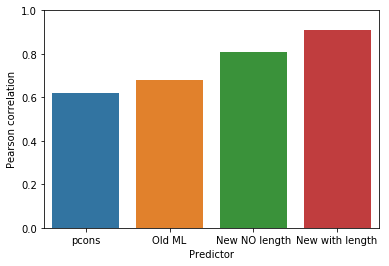

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfr =  pd.read_csv("result.csv")

ax = sns.barplot(x="Predictor", y="Pearson", data=dfr)
ax.set_ylim(0,1)

ax.set_ylabel("Pearson correlation")
fig = ax.get_figure()

plt.show() 